# Program Predicting Whether Individuals Will Get Cancer or Not

## 1. Installing Required Libraries (Gerekli Kütüphanelerin Yüklenmesi)

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiklerin daha güzel görünmesi için seaborn stilini kullanıyoruz
sns.set(style="whitegrid")

## 2. Loading the Data Set (Veri Setinin Yüklenmesi)

In [50]:
data = pd.read_csv('cancer_prediction_dataset.csv')  

# İlgili sütunları seçiyoruz
features = ['Age', 'Smoking', 'Family_History', 'Alcohol', 'Exercise']
target = 'Cancer_Diagnosis'

In [51]:
data

,First_Name,Last_Name,Age,Gender,Smoking,Family_History,Alcohol,Exercise,BMI,White_Blood_Cells,Red_Blood_Cells,Cancer_Diagnosis
0,Robert,Rodriguez,26,0,0,0,0,0,17.327569,9.563679,5.523403,1
1,Emily,Johnson,28,0,0,1,0,1,37.430394,7.518460,5.525283,1
2,Jessica,Wilson,43,1,1,0,0,0,37.510451,8.038327,5.667681,0
3,David,Rodriguez,20,0,1,0,1,1,30.827536,7.447624,5.783101,1
4,Robert,Wilson,63,0,1,0,1,0,23.475745,5.366701,4.778356,0
5,Sophia,Jones,27,0,1,1,0,0,23.730239,9.057165,4.753791,1
6,Michael,Johnson,43,1,0,1,1,0,33.148892,5.965407,5.495738,0
7,Robert,Brown,30,0,1,1,1,1,37.427756,4.170212,5.124910,1
8,Jessica,Davis,70,0,0,0,1,1,37.177161,8.518306,5.254917,0
9,David,Garcia,36,1,0,0,1,0,34.496889,5.239775,5.489482,0


## 3. Data Preparation (Veri Hazırlığı)

In [39]:
# İlgili sütunları seçiyoruz
features = ['Age', 'Smoking', 'Family_History', 'Alcohol', 'Exercise']
target = 'Cancer_Diagnosis'

# Özellikler ve hedef değişken olarak ayırıyoruz
X = data[features]
y = data[target]

## 4. Separating Data into Training and Test Sets (Veriyi Eğitim ve Test Setlerine Ayırma)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Building and Training a Decision Tree Model (Karar Ağacı Modeli Oluşturma ve Eğitme)

In [41]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 6. Evaluating Model Performance (Model Performansını Değerlendirme)

In [42]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 62.50%


## 7. Calculating Cancer Risk Percentages by Each Variable (Her Bir Değişkene Göre Kanser Riski Yüzdelerini Hesaplama)

In [53]:
risk_by_age = data.groupby('Age')[target].mean().reset_index()
risk_by_smoking = data.groupby('Smoking')[target].mean().reset_index()
risk_by_family_history = data.groupby('Family_History')[target].mean().reset_index()
risk_by_alcohol = data.groupby('Alcohol')[target].mean().reset_index()
risk_by_exercise = data.groupby('Exercise')[target].mean().reset_index()

## 8. Creating a Graph (Grafik Oluşturma)

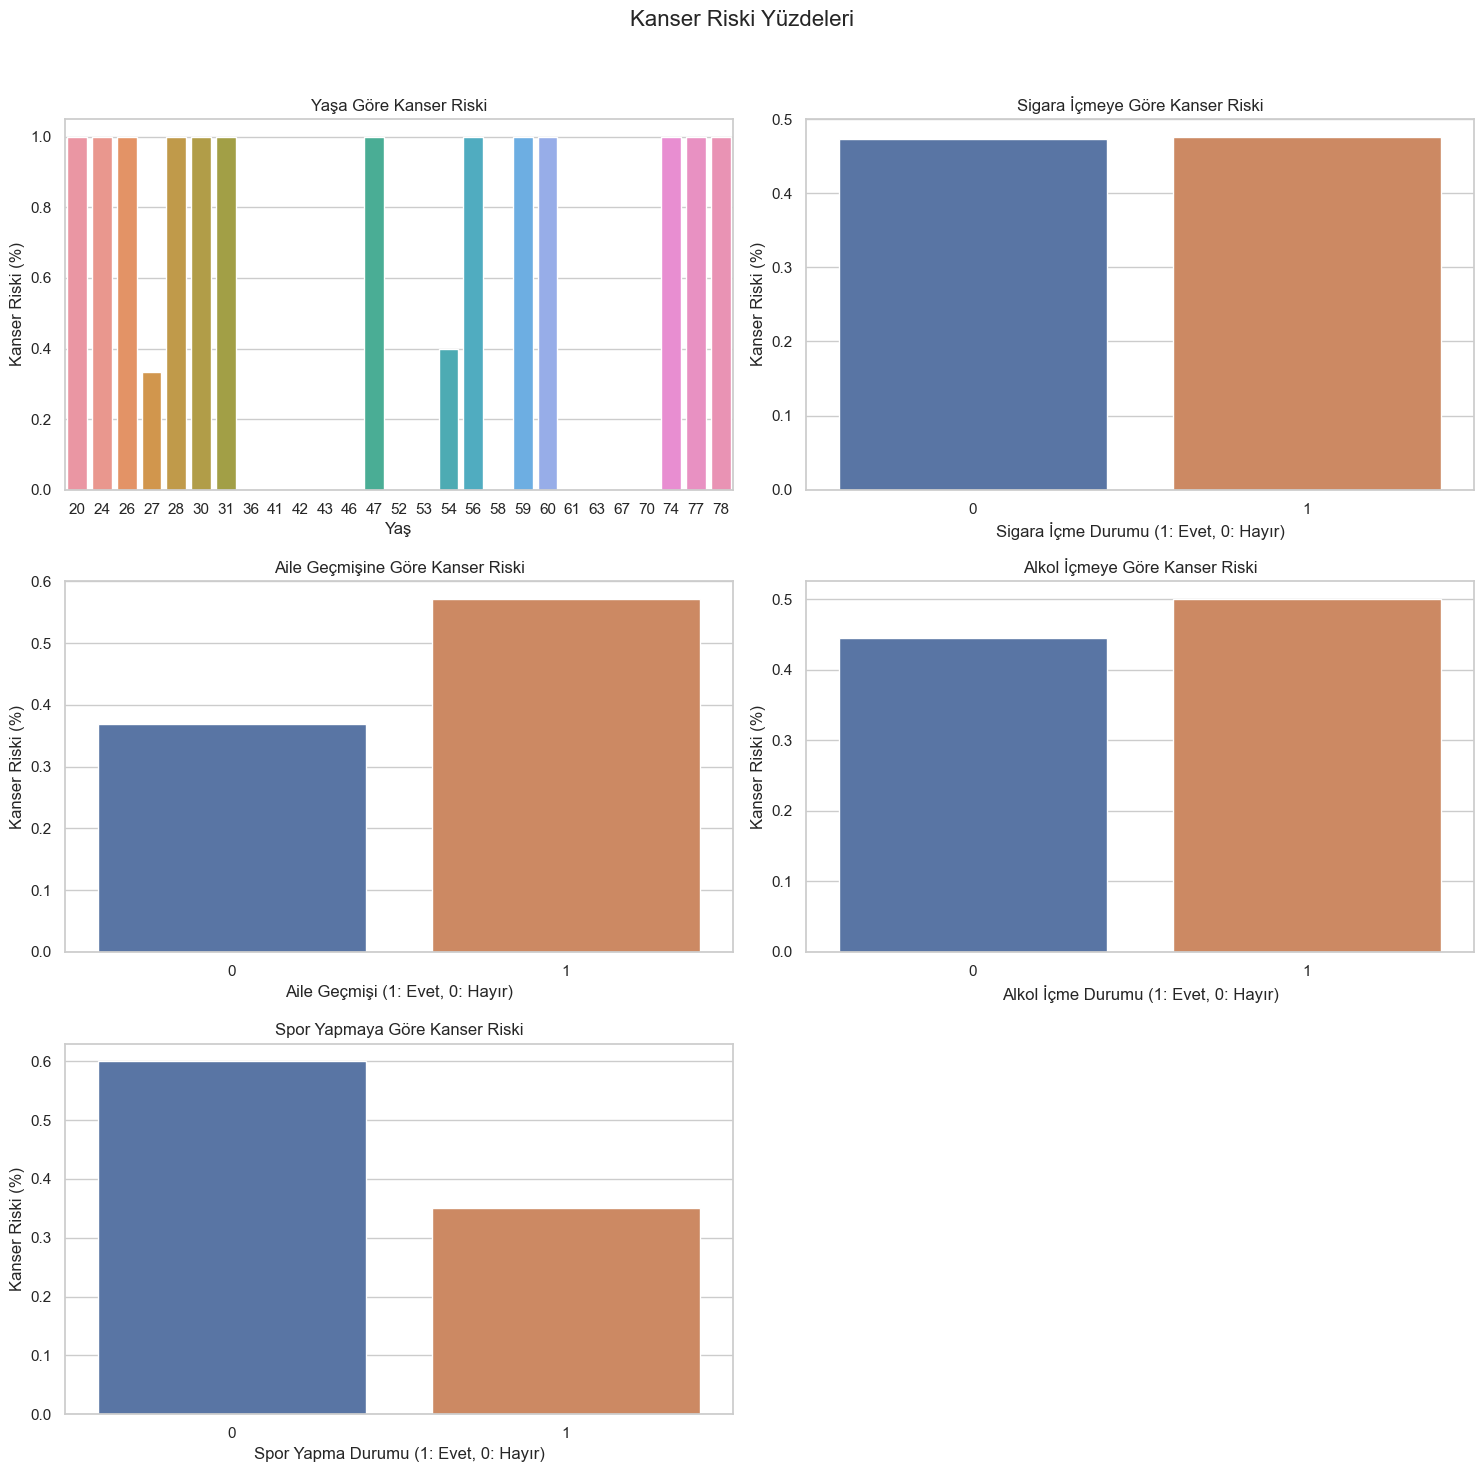

In [54]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Kanser Riski Yüzdeleri', fontsize=16)

# Yaşa göre kanser riski
sns.barplot(x='Age', y='Cancer_Diagnosis', data=risk_by_age, ax=axes[0, 0])
axes[0, 0].set_title('Yaşa Göre Kanser Riski')
axes[0, 0].set_ylabel('Kanser Riski (%)')
axes[0, 0].set_xlabel('Yaş')

# Sigara içmeye göre kanser riski
sns.barplot(x='Smoking', y='Cancer_Diagnosis', data=risk_by_smoking, ax=axes[0, 1])
axes[0, 1].set_title('Sigara İçmeye Göre Kanser Riski')
axes[0, 1].set_ylabel('Kanser Riski (%)')
axes[0, 1].set_xlabel('Sigara İçme Durumu (1: Evet, 0: Hayır)')

# Aile geçmişine göre kanser riski
sns.barplot(x='Family_History', y='Cancer_Diagnosis', data=risk_by_family_history, ax=axes[1, 0])
axes[1, 0].set_title('Aile Geçmişine Göre Kanser Riski')
axes[1, 0].set_ylabel('Kanser Riski (%)')
axes[1, 0].set_xlabel('Aile Geçmişi (1: Evet, 0: Hayır)')

# Alkol içmeye göre kanser riski
sns.barplot(x='Alcohol', y='Cancer_Diagnosis', data=risk_by_alcohol, ax=axes[1, 1])
axes[1, 1].set_title('Alkol İçmeye Göre Kanser Riski')
axes[1, 1].set_ylabel('Kanser Riski (%)')
axes[1, 1].set_xlabel('Alkol İçme Durumu (1: Evet, 0: Hayır)')

# Spor yapmaya göre kanser riski
sns.barplot(x='Exercise', y='Cancer_Diagnosis', data=risk_by_exercise, ax=axes[2, 0])
axes[2, 0].set_title('Spor Yapmaya Göre Kanser Riski')
axes[2, 0].set_ylabel('Kanser Riski (%)')
axes[2, 0].set_xlabel('Spor Yapma Durumu (1: Evet, 0: Hayır)')

# Boş olan grafiği temizliyoruz
axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 9. Forecasting (Tahminleme)

In [59]:
X=df.drop("Cancer_Diagnosis",axis=1)
y=df.Cancer_Diagnosis
k=0
accuracy=[]
for train,test in kfold.split(df):
    print(k,len(train),len(test))
    k+=1
    trainSet=df.iloc[train]
    testSet=df.iloc[test]

    dt=tree.DecisionTreeClassifier(criterion="gini")
    dt.fit(trainSet.drop("Cancer_Diagnosis",axis=1),trainSet.Cancer_Diagnosis)

    pred=dt.predict(testSet.drop("Cancer_Diagnosis",axis=1))
    score=accuracy_score(testSet.Gender,pred)
    accuracy.append(score)
    print("Accuracy:"+str(score))

0 36 4
Accuracy:0.5
1 36 4
Accuracy:0.5
2 36 4
Accuracy:0.25
3 36 4
Accuracy:0.5
4 36 4
Accuracy:0.5
5 36 4
Accuracy:0.75
6 36 4
Accuracy:0.5
7 36 4
Accuracy:0.5
8 36 4
Accuracy:0.5
9 36 4
Accuracy:0.75


0.525


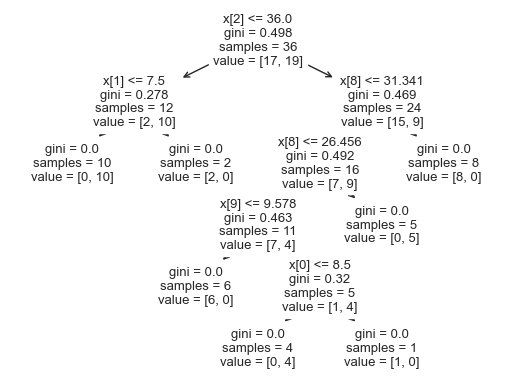

In [60]:
print(sum(accuracy)/len(accuracy))
from matplotlib import pyplot as plt
tree.plot_tree(dt)
plt.show()